In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import re
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
UCDP_Figures = pd.read_csv(r"C:\Users\Tom\Documents\Myanmar_Project\Data_&_Codebooks\GEDEvent_v22_1.csv", 
                           low_memory = False)

In [3]:
UCDP_Figures.head()

id               relid  year  active_year code_status  \
0  244657  IRQ-2017-1-524-322  2017            1       Clear   
1  412700  IRQ-2021-1-524-145  2021            1       Clear   
2  413023  IRQ-2021-1-524-143  2021            1       Clear   
3  412909  IRQ-2021-1-524-144  2021            1       Clear   
4  132140    AFG-1989-1-411-2  1989            1       Clear   

   type_of_violence  conflict_dset_id  conflict_new_id  \
0                 1               259              259   
1                 1               259              259   
2                 1               259              259   
3                 1               259              259   
4                 1               333              333   

             conflict_name  dyad_dset_id  ...                 date_end  \
0         Iraq: Government           524  ...  2017-07-31 00:00:00.000   
1         Iraq: Government           524  ...  2021-08-26 00:00:00.000   
2         Iraq: Government           524  ...  2021-08-28 00:00:00.000   
3         Iraq: Government           524  ...  2021-08-29 00:00:00.000   
4  Afghanistan: Government           724  ...  1989-01-13 00:00:00.000   

  deaths_a  deaths_b  deaths_civilians deaths_unknown  best  high  low  gwnoa  \
0        0         4                 0              2     6     6    6    645   
1       13         1               141             28   183   184  171    645   
2        0         2                 0              0     2     3    0    645   
3        0         0                10              0    10    10    9    645   
4        6         0                 0              0     6     6    6    700   

  gwnob  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN  

[5 rows x 49 columns]

In [4]:
UCDP_Figures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293634 entries, 0 to 293633
Data columns (total 49 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 293634 non-null  int64  
 1   relid              293634 non-null  object 
 2   year               293634 non-null  int64  
 3   active_year        293634 non-null  int64  
 4   code_status        293634 non-null  object 
 5   type_of_violence   293634 non-null  int64  
 6   conflict_dset_id   293634 non-null  int64  
 7   conflict_new_id    293634 non-null  int64  
 8   conflict_name      293634 non-null  object 
 9   dyad_dset_id       293634 non-null  int64  
 10  dyad_new_id        293634 non-null  int64  
 11  dyad_name          293634 non-null  object 
 12  side_a_dset_id     293634 non-null  int64  
 13  side_a_new_id      293634 non-null  int64  
 14  side_a             293634 non-null  object 
 15  side_b_dset_id     293634 non-null  int64  
 16  si

In [5]:
pd.to_datetime(UCDP_Figures["date_end"], dayfirst=True).head()

0   2017-07-31
1   2021-08-26
2   2021-08-28
3   2021-08-29
4   1989-01-13
Name: date_end, dtype: datetime64[ns]

In [6]:
# this changes specific columns from strings to datetime values
UCDP_Figures["date_start"] = pd.to_datetime(UCDP_Figures["date_start"], dayfirst=True)
UCDP_Figures["date_end"] = pd.to_datetime(UCDP_Figures["date_end"], dayfirst=True)

# this sorts the values in date_end into chronological order, which will be necessary for plotting values to graphs later on
UCDP_Figures.sort_values(by='date_end', inplace = True)

In [7]:
UCDP_Figures.dtypes

id                            int64
relid                        object
year                          int64
active_year                   int64
code_status                  object
type_of_violence              int64
conflict_dset_id              int64
conflict_new_id               int64
conflict_name                object
dyad_dset_id                  int64
dyad_new_id                   int64
dyad_name                    object
side_a_dset_id                int64
side_a_new_id                 int64
side_a                       object
side_b_dset_id                int64
side_b_new_id                 int64
side_b                       object
number_of_sources             int64
source_article               object
source_office                object
source_date                  object
source_headline              object
source_original              object
where_prec                    int64
where_coordinates            object
where_description            object
adm_1                       

For the analysis I'll use the "best" column for death figures (rather than the data in the "high" and "low" columns), UCDP claims this is the most accurate number of death figures. Figures in columns "deaths_a", "deaths_b", "deaths_civilians" and "deaths_unknown" are also based on the "best" figures so it makes sense to use this going forward.

In [8]:
UCDP_Figures["conflict_name"].value_counts()

Syria: Government                                                   64815
Afghanistan: Government                                             37548
India: Kashmir                                                       6541
Syria: Islamic State                                                 6177
Iraq: Government                                                     6134
                                                                    ...  
ARLA, FIAA, FPLA - MPA                                                  1
Oromo - Gamo, Guraghe                                                   1
Ndoki - Ogoni                                                           1
Sabaneta - Pavilion I gang - Sabaneta - Re-education sector gang        1
Majerteen subclan (Darod) - Ogaden clan (Darod)                         1
Name: conflict_name, Length: 1351, dtype: int64

In [9]:
UCDP_Figures["conflict_name"].unique()

array(['India: Punjab/Khalistan', 'Amal - Hezbollah',
       'Afghanistan: Government', ..., 'Los Choneros - Los Lobos',
       'IS - Banibangou Vigilance Committee', 'Misseriya - Arab'],
      dtype=object)

In [10]:
# If necessary all unique names of conflicts could be printed with the following code;
#for x in UCDP_Figures["conflict_name"].unique(): 
#    print(x)

Below we can see the unique Conflict Names that relate to Myanmar in this dataset.

Without even looking at fatality figures, we can see that most violence that has been recorded is what UCDP calls "one-sided violence", where an armed group directs violence towards a non-armed group i.e. civilians.

In [11]:
#.str.contains("Myanmar|Burma", flags=re.I, regex=True) filters the dataset by rows relating to any conflict which includes the 
#term "Myanmar" or "Burma", the regular expression means that these strings are not case sensitive. Each of these rows 
#represents an individual event recorded by UCDP. 
UCDP_Myanmar = UCDP_Figures[UCDP_Figures["conflict_name"].str.contains("Myanmar|Burma", flags=re.I, regex=True)]

#The value_counts() function is counting each individual row relating to these conflicts
UCDP_Myanmar["conflict_name"].value_counts()

Government of Myanmar (Burma) - Civilians    1654
Myanmar (Burma): Government                   511
Myanmar (Burma): Karen                        419
Myanmar (Burma): Kachin                       305
Myanmar (Burma): Arakan                       219
Myanmar (Burma): Shan                         203
Myanmar (Burma): Karenni                      112
Myanmar (Burma): Kokang                        95
Buddhists (Myanmar) - Muslims (Myanmar)        25
Myanmar (Burma): Nagaland                      19
Myanmar (Burma): Mon                           12
Myanmar (Burma): Wa                            10
Name: conflict_name, dtype: int64

### The code in the box below was no longer needed after looking at the graphs later on

In [12]:
# this code checks the "best" column and returns True for rows with null values, and then prints True if there are 
# any null values at all

print(pd.isnull(UCDP_Myanmar["best"]).any())

# this code checks for 0 values (events with 0 deaths) as they won't be needed
a = 0
for x in UCDP_Myanmar["best"]:
    if x == 0:
        a += 1

print(a)


# this code drops the 0 values from UCDP_Myanmar
# UCDP_Myanmar = UCDP_Myanmar.loc[UCDP_Myanmar["best"] != 0]

False
425


Text(0, 0.5, 'Deaths')

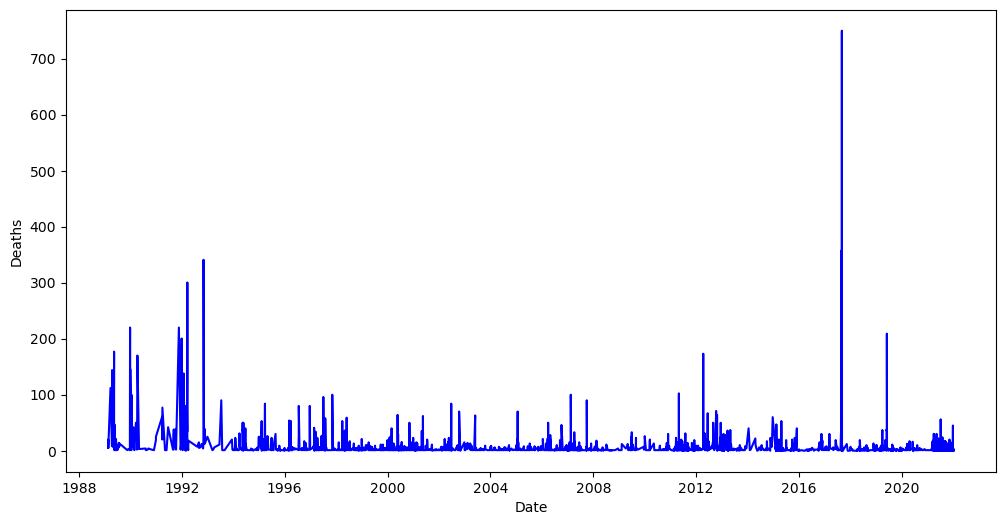

In [13]:
fig, axes = plt.subplots(figsize=(12, 6))

x = UCDP_Myanmar["date_end"]
y = UCDP_Myanmar["best"]

axes.plot(x, y, 'b', label='Total Deaths')

axes.set_xlabel("Date")
axes.set_ylabel("Deaths")

In [14]:
UCDP_Myanmar.dtypes

id                            int64
relid                        object
year                          int64
active_year                   int64
code_status                  object
type_of_violence              int64
conflict_dset_id              int64
conflict_new_id               int64
conflict_name                object
dyad_dset_id                  int64
dyad_new_id                   int64
dyad_name                    object
side_a_dset_id                int64
side_a_new_id                 int64
side_a                       object
side_b_dset_id                int64
side_b_new_id                 int64
side_b                       object
number_of_sources             int64
source_article               object
source_office                object
source_date                  object
source_headline              object
source_original              object
where_prec                    int64
where_coordinates            object
where_description            object
adm_1                       

In [15]:
# set date_end as index so that filtering by date is possible
UCDP_Myanmar = UCDP_Myanmar.set_index("date_end")

UCDP_Myanmar

id                 relid  year  active_year code_status  \
date_end                                                                  
1989-02-21   49343      MYA-1989-1-304-1  1989            1       Clear   
1989-02-21   49166      MYA-1989-1-306-1  1989            1       Clear   
1989-02-22   50009      MYA-1989-1-306-2  1989            1       Clear   
1989-03-04   49542      MYA-1989-1-304-2  1989            1       Clear   
1989-03-26   49974      MYA-1989-1-306-3  1989            1       Clear   
...            ...                   ...   ...          ...         ...   
2021-12-31  426708  MYA-2021-1-16759-406  2021            1       Clear   
2021-12-31  426709     MYA-2021-1-511-45  2021            1       Clear   
2021-12-31  426772     MYA-2021-1-428-39  2021            1       Clear   
2021-12-31  426706    MYA-2021-3-955-233  2021            1       Clear   
2022-01-03  426902     MYA-2021-1-428-40  2021            1       Clear   

            type_of_violence  conflict_dset_id  conflict_new_id  \
date_end                                                          
1989-02-21                 1               231              231   
1989-02-21                 1               221              221   
1989-02-22                 1               221              221   
1989-03-04                 1               231              231   
1989-03-26                 1               221              221   
...                      ...               ...              ...   
2021-12-31                 1               222              222   
2021-12-31                 1               253              253   
2021-12-31                 1               221              221   
2021-12-31                 3               144              488   
2022-01-03                 1               221              221   

                                        conflict_name  dyad_dset_id  ...  \
date_end                                                             ...   
1989-02-21                    Myanmar (Burma): Kachin           461  ...   
1989-02-21                     Myanmar (Burma): Karen           428  ...   
1989-02-22                     Myanmar (Burma): Karen           428  ...   
1989-03-04                    Myanmar (Burma): Kachin           461  ...   
1989-03-26                     Myanmar (Burma): Karen           428  ...   
...                                               ...           ...  ...   
2021-12-31                Myanmar (Burma): Government         16759  ...   
2021-12-31                   Myanmar (Burma): Karenni           511  ...   
2021-12-31                     Myanmar (Burma): Karen           428  ...   
2021-12-31  Government of Myanmar (Burma) - Civilians           144  ...   
2022-01-03                     Myanmar (Burma): Karen           428  ...   

            date_start deaths_a  deaths_b  deaths_civilians deaths_unknown  \
date_end                                                                     
1989-02-21  1989-02-21        0         0                 0              5   
1989-02-21  1989-02-17       16         0                 4              0   
1989-02-22  1989-02-22        0         0                 5              0   
1989-03-04  1989-03-04       36         0                 0              0   
1989-03-26  1989-03-23       38         0                 0             74   
...                ...      ...       ...               ...            ...   
2021-12-31  2021-12-31        0         0                 0              1   
2021-12-31  2021-12-31        0         2                 0              1   
2021-12-31  2021-12-01        0         0                 0              0   
2021-12-31  2021-12-31        0         0                 2              0   
2022-01-03  2021-12-27        0         0                 0              0   

            best  high  low  gwnoa gwnob  
date_end                                  
1989-02-21     5     5    5    775   NaN  
1989-02-21    20    20   20    775 

In [16]:
# filters 'UCDP_MyanmarRefined' to events from 2010 onwards
UCDP_MyanmarRefined = UCDP_Myanmar["2010-01-01":"2022-12-31"]

# reset_index so that date_end can be used for x axis in matplotlib
UCDP_MyanmarRefined = UCDP_MyanmarRefined.reset_index()

UCDP_MyanmarRefined

date_end      id                 relid  year  active_year code_status  \
0    2010-01-17   49033      MYA-2010-3-775-1  2010            1       Clear   
1    2010-01-19   49931      MYA-2010-3-775-4  2010            1       Clear   
2    2010-01-19   49930      MYA-2010-3-775-5  2010            1       Clear   
3    2010-01-19   49028      MYA-2010-3-775-3  2010            1       Clear   
4    2010-02-06   51262      MYA-2010-3-775-6  2010            1       Clear   
...         ...     ...                   ...   ...          ...         ...   
1895 2021-12-31  426708  MYA-2021-1-16759-406  2021            1       Clear   
1896 2021-12-31  426709     MYA-2021-1-511-45  2021            1       Clear   
1897 2021-12-31  426772     MYA-2021-1-428-39  2021            1       Clear   
1898 2021-12-31  426706    MYA-2021-3-955-233  2021            1       Clear   
1899 2022-01-03  426902     MYA-2021-1-428-40  2021            1       Clear   

      type_of_violence  conflict_dset_id  conflict_new_id  \
0                    3               144              488   
1                    3               144              488   
2                    3               144              488   
3                    3               144              488   
4                    3               144              488   
...                ...               ...              ...   
1895                 1               222              222   
1896                 1               253              253   
1897                 1               221              221   
1898                 3               144              488   
1899                 1               221              221   

                                  conflict_name  ...  date_start  deaths_a  \
0     Government of Myanmar (Burma) - Civilians  ...  2010-01-17         0   
1     Government of Myanmar (Burma) - Civilians  ...  2010-01-19         0   
2     Government of Myanmar (Burma) - Civilians  ...  2010-01-19         0   
3     Government of Myanmar (Burma) - Civilians  ...  2010-01-19         0   
4     Government of Myanmar (Burma) - Civilians  ...  2010-02-06         0   
...                                         ...  ...         ...       ...   
1895                Myanmar (Burma): Government  ...  2021-12-31         0   
1896                   Myanmar (Burma): Karenni  ...  2021-12-31         0   
1897                     Myanmar (Burma): Karen  ...  2021-12-01         0   
1898  Government of Myanmar (Burma) - Civilians  ...  2021-12-31         0   
1899                     Myanmar (Burma): Karen  ...  2021-12-27         0   

     deaths_b  deaths_civilians  deaths_unknown best  high  low gwnoa  gwnob  
0           0                 1               0    1     1    1   775    NaN  
1           0                 1               0    1     1    1   775    NaN  
2           0                 1               0    1     1    1   775    NaN  
3           0                 1               0    1     1    1   775    NaN  
4           0                 1               0    1     1    1   775    NaN  
...       ...               ...             ...  ...   ...  ...   ...    ...  
1895        0                 0               1    1     4    0   775    NaN  
1896        2                 0               1    3    32    2   775    NaN  
1897        0                 0               0    0   122    0   775    NaN  
1898        0                 2               0    2     2    2   775    NaN  
1899        0                 0               0    0    80    0   775    NaN  

[1900 rows x 49 columns]

Text(0, 0.5, 'Deaths')

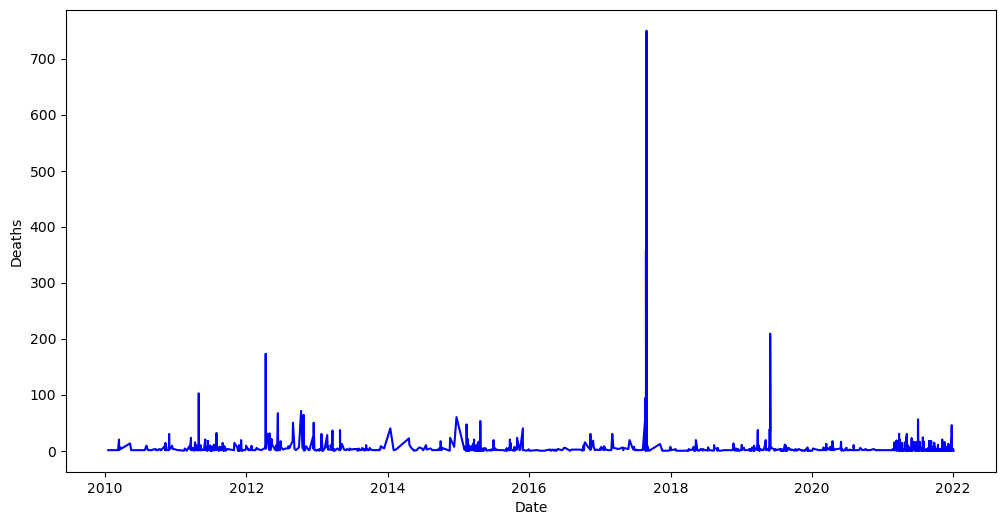

In [17]:
fig, axes = plt.subplots(figsize=(12, 6))

x = UCDP_MyanmarRefined["date_end"]
y = UCDP_MyanmarRefined["best"]

axes.plot(x, y, 'b', label='Total Deaths')

axes.set_xlabel("Date")
axes.set_ylabel("Deaths")

### Bokeh
The interactive Bokeh library will be more appropriate for analysis as we need to easily zoom in to specifict points over a long timespan.

In [18]:
# reset index so "date_end" can be used for bokeh
UCDP_Myanmar = UCDP_Myanmar.reset_index()

In [19]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [20]:
output_notebook()

Loading BokehJS ...

The graph below shows the number of deaths from all the events verified by UCDP, each point is an event, and days where events have not been recorded do not have points that show up on this graph.

In [21]:
p1 = figure(x_axis_type="datetime", title="Recorded Deaths per Event", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = "Conflict Event by Date"
p1.yaxis.axis_label = "Deaths"

p1.line(UCDP_Myanmar["date_end"], UCDP_Myanmar["best"], color='#f2a900', legend_label='Number of Deaths')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

The scatter plot below is helpful as it clearly shows each individually recorded event, and doesn't show any points where there has not been a recorded event. This humanizes the data as it clearly shows each individual point, but a line graph is still shows overall trends more clearly.

In [22]:
p = figure(x_axis_type="datetime", title="Recorded Deaths per Event", width=800)

p.circle(UCDP_Myanmar["date_end"], UCDP_Myanmar["best"], size=2, color="navy", alpha=0.5)

show(p)


### More Data Cleaning

To make the linegraph more accurate, the data needs to be cleaned further. Dates which haven't been included (as there is no conflict event recorded by UCDP), will need to be included as 0 or NaN. 
But first different actors in this conflict also need to be identified and filtered in order for us to show different lines on the graphs.
Separation of different actors into individual dataframes will also be necessary for future projects, so it might as well be done now.

In [23]:
UCDP_Myanmar["side_a"].unique()

array(['Government of Myanmar (Burma)', 'Buddhists (Myanmar)'],
      dtype=object)

In [24]:
UCDP_Myanmar["side_b"].unique()

array(['KIO', 'KNU', 'Civilians', 'KNPP', 'NMSP', 'ABSDF', 'RSO',
       'NSCN-K', 'MTA', 'PSLF', 'RCSS', 'BMA', 'UWSA', "God's Army",
       'Muslims (Myanmar)', 'SSPP', 'MNDAA', 'DKBA 5', 'ULA', 'ARSA',
       'NUG'], dtype=object)

In [25]:
#This groups Civilians death figures into a seperate dataframe, and then checks the "deaths_b" column for any figures. The 
#UCDP codebook tells us that all civillian deaths are recorded in the "deaths_civilians" column and other non-state deaths are 
#recorded in the "deaths_b" column, this code confirms this. 

UCDP_Civilians = UCDP_Myanmar.loc[UCDP_Myanmar["side_b"] == "Civilians"]
UCDP_Civilians.loc[UCDP_Civilians['deaths_b'] > 0]

Empty DataFrame
Columns: [date_end, id, relid, year, active_year, code_status, type_of_violence, conflict_dset_id, conflict_new_id, conflict_name, dyad_dset_id, dyad_new_id, dyad_name, side_a_dset_id, side_a_new_id, side_a, side_b_dset_id, side_b_new_id, side_b, number_of_sources, source_article, source_office, source_date, source_headline, source_original, where_prec, where_coordinates, where_description, adm_1, adm_2, latitude, longitude, geom_wkt, priogrid_gid, country, country_id, region, event_clarity, date_prec, date_start, deaths_a, deaths_b, deaths_civilians, deaths_unknown, best, high, low, gwnoa, gwnob]
Index: []

[0 rows x 49 columns]

From this we can see actors in "side_a" are differnt from all the actors in "side_b". This means there will be 24 different actors to include in the graphs. 
There will be 3 columns we need to check for death figures for these individual groups; "deaths_a", "deaths_b" and "deaths_civilians" (deaths_unknown can be ignored as these figures will still be included in the total in "best").

In [26]:
#This groups different actors death figures into seperate dataframes
UCDP_Government = UCDP_Myanmar.loc[UCDP_Myanmar["side_a"] == "Government of Myanmar (Burma)"]
UCDP_Buddhists = UCDP_Myanmar.loc[UCDP_Myanmar["side_a"] == "Buddhists (Myanmar)"]
UCDP_KIO = UCDP_Myanmar.loc[UCDP_Myanmar["side_b"] == "KIO"]
UCDP_KNU = UCDP_Myanmar.loc[UCDP_Myanmar["side_b"] == "KNU"]
UCDP_Civilians = UCDP_Myanmar.loc[(UCDP_Myanmar["side_b"] == "Civilians") | (UCDP_Myanmar["deaths_civilians"] > 0)]
UCDP_KNPP = UCDP_Myanmar.loc[UCDP_Myanmar["side_b"] == "KNPP"]
UCDP_NMSP = UCDP_Myanmar.loc[UCDP_Myanmar["side_b"] == "NMSP"]
UCDP_ABSDF = UCDP_Myanmar.loc[UCDP_Myanmar["side_b"] == "ABSDF"]
UCDP_RSO = UCDP_Myanmar.loc[UCDP_Myanmar["side_b"] == "RSO"]
UCDP_NSCN_K = UCDP_Myanmar.loc[UCDP_Myanmar["side_b"] == "NSCN-K"]
UCDP_MTA = UCDP_Myanmar.loc[UCDP_Myanmar["side_b"] == "MTA"]
UCDP_PSLF = UCDP_Myanmar.loc[UCDP_Myanmar["side_b"] == "PSLF"]
UCDP_RCSS = UCDP_Myanmar.loc[UCDP_Myanmar["side_b"] == "RCSS"]
UCDP_BMA = UCDP_Myanmar.loc[UCDP_Myanmar["side_b"] == "BMA"]
UCDP_UWSA = UCDP_Myanmar.loc[UCDP_Myanmar["side_b"] == "UWSA"]
UCDP_Gods_Army = UCDP_Myanmar.loc[UCDP_Myanmar["side_b"] == "God's Army"]
UCDP_Muslims = UCDP_Myanmar.loc[UCDP_Myanmar["side_b"] == "Muslims (Myanmar)"]
UCDP_SSPP = UCDP_Myanmar.loc[UCDP_Myanmar["side_b"] == "SSPP"]
UCDP_MNDAA = UCDP_Myanmar.loc[UCDP_Myanmar["side_b"] == "MNDAA"]
UCDP_DKBA5 = UCDP_Myanmar.loc[UCDP_Myanmar["side_b"] == "DKBA 5"]
UCDP_ULA = UCDP_Myanmar.loc[UCDP_Myanmar["side_b"] == "ULA"]
UCDP_ARSA = UCDP_Myanmar.loc[UCDP_Myanmar["side_b"] == "ARSA"]
UCDP_NUG = UCDP_Myanmar.loc[UCDP_Myanmar["side_b"] == "NUG"]

In [27]:
#in all these new dataframes, for data visualisation later on it is necessary to reduce the columns "deaths_a", "deaths_b", 
#"deaths_civilians" to 1 column showing deaths from the actor that the particular dataframe is representing
UCDP_Government.rename(columns={"deaths_a": "deaths"}, inplace=True)
UCDP_Government.drop(columns=["deaths_b", "deaths_civilians"], inplace=True)
UCDP_Buddhists.rename(columns={"deaths_a": "deaths"}, inplace=True)
UCDP_Buddhists.drop(columns=["deaths_b", "deaths_civilians"], inplace=True)
UCDP_KIO.rename(columns={"deaths_b": "deaths"}, inplace=True)
UCDP_KIO.drop(columns=["deaths_a", "deaths_civilians"], inplace=True)
UCDP_KNU.rename(columns={"deaths_b": "deaths"}, inplace=True)
UCDP_KNU.drop(columns=["deaths_a", "deaths_civilians"], inplace=True)
UCDP_Civilians.rename(columns={"deaths_civilians": "deaths"}, inplace=True)
UCDP_Civilians.drop(columns=["deaths_a", "deaths_b"], inplace=True)
UCDP_KNPP.rename(columns={"deaths_b": "deaths"}, inplace=True)
UCDP_KNPP.drop(columns=["deaths_a", "deaths_civilians"], inplace=True)
UCDP_NMSP.rename(columns={"deaths_b": "deaths"}, inplace=True)
UCDP_NMSP.drop(columns=["deaths_a", "deaths_civilians"], inplace=True)
UCDP_ABSDF.rename(columns={"deaths_b": "deaths"}, inplace=True)
UCDP_ABSDF.drop(columns=["deaths_a", "deaths_civilians"], inplace=True)
UCDP_RSO.rename(columns={"deaths_b": "deaths"}, inplace=True)
UCDP_RSO.drop(columns=["deaths_a", "deaths_civilians"], inplace=True)
UCDP_NSCN_K.rename(columns={"deaths_b": "deaths"}, inplace=True)
UCDP_NSCN_K.drop(columns=["deaths_a", "deaths_civilians"], inplace=True)
UCDP_MTA.rename(columns={"deaths_b": "deaths"}, inplace=True)
UCDP_MTA.drop(columns=["deaths_a", "deaths_civilians"], inplace=True)
UCDP_PSLF.rename(columns={"deaths_b": "deaths"}, inplace=True)
UCDP_PSLF.drop(columns=["deaths_a", "deaths_civilians"], inplace=True)
UCDP_RCSS.rename(columns={"deaths_b": "deaths"}, inplace=True)
UCDP_RCSS.drop(columns=["deaths_a", "deaths_civilians"], inplace=True)
UCDP_BMA.rename(columns={"deaths_b": "deaths"}, inplace=True)
UCDP_BMA.drop(columns=["deaths_a", "deaths_civilians"], inplace=True)
UCDP_UWSA.rename(columns={"deaths_b": "deaths"}, inplace=True)
UCDP_UWSA.drop(columns=["deaths_a", "deaths_civilians"], inplace=True)
UCDP_Gods_Army.rename(columns={"deaths_b": "deaths"}, inplace=True)
UCDP_Gods_Army.drop(columns=["deaths_a", "deaths_civilians"], inplace=True)
UCDP_Muslims.rename(columns={"deaths_b": "deaths"}, inplace=True)
UCDP_Muslims.drop(columns=["deaths_a", "deaths_civilians"], inplace=True)
UCDP_SSPP.rename(columns={"deaths_b": "deaths"}, inplace=True)
UCDP_SSPP.drop(columns=["deaths_a", "deaths_civilians"], inplace=True)
UCDP_MNDAA.rename(columns={"deaths_b": "deaths"}, inplace=True)
UCDP_MNDAA.drop(columns=["deaths_a", "deaths_civilians"], inplace=True)
UCDP_DKBA5.rename(columns={"deaths_b": "deaths"}, inplace=True)
UCDP_DKBA5.drop(columns=["deaths_a", "deaths_civilians"], inplace=True)
UCDP_ULA.rename(columns={"deaths_b": "deaths"}, inplace=True)
UCDP_ULA.drop(columns=["deaths_a", "deaths_civilians"], inplace=True)
UCDP_ARSA.rename(columns={"deaths_b": "deaths"}, inplace=True)
UCDP_ARSA.drop(columns=["deaths_a", "deaths_civilians"], inplace=True)
UCDP_NUG.rename(columns={"deaths_b": "deaths"}, inplace=True)
UCDP_NUG.drop(columns=["deaths_a", "deaths_civilians"], inplace=True)


In [28]:
UCDP_NMSP

date_end      id                relid  year  active_year code_status  \
44   1990-02-10   50651     MYA-1990-1-310-1  1990            1       Clear   
45   1990-02-13   50650     MYA-1990-1-310-2  1990            1       Clear   
49   1990-03-22   50728     MYA-1990-1-310-4  1990            1       Clear   
154  1994-02-15   49299     MYA-1994-1-310-1  1994            0       Clear   
195  1994-06-21   49916     MYA-1994-1-310-2  1994            0       Clear   
201  1994-07-21   50573     MYA-1994-1-310-3  1994            0       Clear   
212  1994-09-28   49022     MYA-1994-1-310-5  1994            0       Clear   
219  1994-12-14   49398     MYA-1994-1-310-6  1994            0       Clear   
228  1995-01-29   51201     MYA-1995-1-310-1  1995            0       Clear   
2121 2013-07-16   71404  MYA-2013-1-310-1000  2013            0       Clear   
2727 2019-11-27  320931     MYA-2019-1-445-0  2019            0       Clear   

      type_of_violence  conflict_dset_id  conflict_new_id  \
44                   1               224              224   
45                   1               224              224   
49                   1               224              224   
154                  1               224              224   
195                  1               224              224   
201                  1               224              224   
212                  1               224              224   
219                  1               224              224   
228                  1               224              224   
2121                 1               224              224   
2727                 1               224              224   

             conflict_name  ...  event_clarity  date_prec date_start  deaths  \
44    Myanmar (Burma): Mon  ...              2          2 1990-02-09      20   
45    Myanmar (Burma): Mon  ...              2          4 1990-01-30      20   
49    Myanmar (Burma): Mon  ...              1          1 1990-03-22       3   
154   Myanmar (Burma): Mon  ...              1          2 1994-02-14       5   
195   Myanmar (Burma): Mon  ...              1          1 1994-06-21       0   
201   Myanmar (Burma): Mon  ...              1          1 1994-07-21       0   
212   Myanmar (Burma): Mon  ...              1          1 1994-09-28       0   
219   Myanmar (Burma): Mon  ...              1          1 1994-12-14       0   
228   Myanmar (Burma): Mon  ...              1          1 1995-01-29       0   
2121  Myanmar (Burma): Mon  ...              1          1 2013-07-16       2   
2727  Myanmar (Burma): Mon  ...              1          1 2019-11-27       0   

      deaths_unknown best  high  low gwnoa  gwnob  
44                 0   20    20   20   775    NaN  
45                 0   42    42   42   775    NaN  
49                43   50    50   50   775    NaN  
154                0    5     5    5   775    NaN  
195                0    1     1    1   775    NaN  
201                0    1     1    1   775    NaN  
212                1    2     2    2   775    NaN  
219                1    6     6    6   775    NaN  
228                3    4     4    4   775    NaN  
2121               0    3     3    3   775    NaN  
2727               0    0     1    0   775    NaN  

[11 rows x 47 columns]

Like stated earlier, dates which haven't been included (as there is no conflict event recorded by UCDP), will be included as 0 or NaN. 

From comparing the length of 'idx' below and the shape of UCDP_Myanmar, we can clearly see that since UCDP records began, there has been a recorded conflict event for more than 1/3 of the total days. 

In [29]:
# period_range: Return a fixed frequency PeriodIndex. The day (calendar) is the default frequency.
# this returns each day between the period of the 1st recorded date and the last recorded date.
idx = pd.period_range(min(UCDP_Myanmar['date_end']), max(UCDP_Myanmar['date_end']))

print(idx)

UCDP_Myanmar.shape

PeriodIndex(['1989-02-21', '1989-02-22', '1989-02-23', '1989-02-24',
             '1989-02-25', '1989-02-26', '1989-02-27', '1989-02-28',
             '1989-03-01', '1989-03-02',
             ...
             '2021-12-25', '2021-12-26', '2021-12-27', '2021-12-28',
             '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-01',
             '2022-01-02', '2022-01-03'],
            dtype='period[D]', length=12005)


(3584, 49)

In [30]:
# reset date_end as index so that .reindex by date is possible
#UCDP_Myanmar = UCDP_Myanmar.set_index("date_end")

In [31]:
# The code below should reindex the data, but does not work because of duplicate indexes on rows, these 'duplicates' are 
# valuable points of information and can't be deleted, so a work around will need to be found.

# UCDP_MyanmarNewIdx = UCDP_Myanmar.reindex(idx, fill_value=0)

# ValueError: cannot reindex on an axis with duplicate labels

In [32]:
# reset index so "date_end" can be used for other solutions
#UCDP_Myanmar = UCDP_Myanmar.reset_index()

In [33]:
# create a new DataFrame containing all the expected dates
date_range = pd.date_range(min(UCDP_Myanmar['date_end']), max(UCDP_Myanmar['date_end']))
expected_df = pd.DataFrame({'date_end': date_range})

# join the two dataframes on the 'date_end' column using a left join
UCDP_Total = pd.merge(expected_df, UCDP_Myanmar, on='date_end', how='left')

# replace missing values with 0
UCDP_Total = UCDP_Total.fillna(0)

UCDP_Total

date_end        id               relid    year  active_year  \
0     1989-02-21   49343.0    MYA-1989-1-304-1  1989.0          1.0   
1     1989-02-21   49166.0    MYA-1989-1-306-1  1989.0          1.0   
2     1989-02-22   50009.0    MYA-1989-1-306-2  1989.0          1.0   
3     1989-02-23       0.0                   0     0.0          0.0   
4     1989-02-24       0.0                   0     0.0          0.0   
...          ...       ...                 ...     ...          ...   
13232 2021-12-31  426772.0   MYA-2021-1-428-39  2021.0          1.0   
13233 2021-12-31  426706.0  MYA-2021-3-955-233  2021.0          1.0   
13234 2022-01-01       0.0                   0     0.0          0.0   
13235 2022-01-02       0.0                   0     0.0          0.0   
13236 2022-01-03  426902.0   MYA-2021-1-428-40  2021.0          1.0   

      code_status  type_of_violence  conflict_dset_id  conflict_new_id  \
0           Clear               1.0             231.0            231.0   
1           Clear               1.0             221.0            221.0   
2           Clear               1.0             221.0            221.0   
3               0               0.0               0.0              0.0   
4               0               0.0               0.0              0.0   
...           ...               ...               ...              ...   
13232       Clear               1.0             221.0            221.0   
13233       Clear               3.0             144.0            488.0   
13234           0               0.0               0.0              0.0   
13235           0               0.0               0.0              0.0   
13236       Clear               1.0             221.0            221.0   

                                   conflict_name  ...           date_start  \
0                        Myanmar (Burma): Kachin  ...  1989-02-21 00:00:00   
1                         Myanmar (Burma): Karen  ...  1989-02-17 00:00:00   
2                         Myanmar (Burma): Karen  ...  1989-02-22 00:00:00   
3                                              0  ...                    0   
4                                              0  ...                    0   
...                                          ...  ...                  ...   
13232                     Myanmar (Burma): Karen  ...  2021-12-01 00:00:00   
13233  Government of Myanmar (Burma) - Civilians  ...  2021-12-31 00:00:00   
13234                                          0  ...                    0   
13235                                          0  ...                    0   
13236                     Myanmar (Burma): Karen  ...  2021-12-27 00:00:00   

       deaths_a deaths_b  deaths_civilians  deaths_unknown  best   high   low  \
0           0.0      0.0               0.0             5.0   5.0    5.0   5.0   
1          16.0      0.0               4.0             0.0  20.0   20.0  20.0   
2           0.0      0.0               5.0             0.0   5.0    5.0   5.0   
3           0.0      0.0               0.0             0.0   0.0    0.0   0.0   
4           0.0      0.0               0.0             0.0   0.0    0.0   0.0   
...         ...      ...               ...             ...   ...    ...   ...   
13232       0.0      0.0               0.0             0.0   0.0  122.0   0.0   
13233       0.0      0.0               2.0             0.0   2.0    2.0   2.0   
13234       0.0      0.0               0.0             0.0   0.0    0.0   0.0   
13235       0.0      0.0               0.0             0.0   0.0    0.0   0.0   
13236       0.0      0.0               0.0             0.0   0.0   80.0   0.0   

      gwnoa  gwnob  
0       775    0.0  
1       775    0.0  
2       775    0.0  
3         0    0.0  
4         0    0.0  
...     ...    ...  
13232   775    0.0  
13233   775    0.0  
13234     0    0.0  
13235     0    0.0  
13236   775    0.0  

[13237 rows x 49 columns]

In [34]:
#This list and for loop does the same as the previous code for UCDP_Total, but for the filtered individual actors dataframes

actors = [UCDP_Government, UCDP_Buddhists, UCDP_KIO, UCDP_KNU, UCDP_Civilians, UCDP_KNPP, UCDP_NMSP, UCDP_ABSDF, UCDP_RSO,
          UCDP_NSCN_K, UCDP_MTA, UCDP_PSLF, UCDP_RCSS, UCDP_BMA, UCDP_UWSA, UCDP_Gods_Army, UCDP_Muslims, UCDP_SSPP, UCDP_MNDAA,
          UCDP_DKBA5, UCDP_ULA, UCDP_ARSA, UCDP_NUG]
merged_actors = []

for i in actors:
    merged_actor = pd.merge(expected_df, i, on='date_end', how='left').fillna(0)
    merged_actors.append(merged_actor)

#You can now access the merged dataframes in the merged_actors list
#print(merged_actors[0])
merged_actors[0] # UCDP_Government merged with expected_df

date_end        id               relid    year  active_year  \
0     1989-02-21   49343.0    MYA-1989-1-304-1  1989.0          1.0   
1     1989-02-21   49166.0    MYA-1989-1-306-1  1989.0          1.0   
2     1989-02-22   50009.0    MYA-1989-1-306-2  1989.0          1.0   
3     1989-02-23       0.0                   0     0.0          0.0   
4     1989-02-24       0.0                   0     0.0          0.0   
...          ...       ...                 ...     ...          ...   
13224 2021-12-31  426772.0   MYA-2021-1-428-39  2021.0          1.0   
13225 2021-12-31  426706.0  MYA-2021-3-955-233  2021.0          1.0   
13226 2022-01-01       0.0                   0     0.0          0.0   
13227 2022-01-02       0.0                   0     0.0          0.0   
13228 2022-01-03  426902.0   MYA-2021-1-428-40  2021.0          1.0   

      code_status  type_of_violence  conflict_dset_id  conflict_new_id  \
0           Clear               1.0             231.0            231.0   
1           Clear               1.0             221.0            221.0   
2           Clear               1.0             221.0            221.0   
3               0               0.0               0.0              0.0   
4               0               0.0               0.0              0.0   
...           ...               ...               ...              ...   
13224       Clear               1.0             221.0            221.0   
13225       Clear               3.0             144.0            488.0   
13226           0               0.0               0.0              0.0   
13227           0               0.0               0.0              0.0   
13228       Clear               1.0             221.0            221.0   

                                   conflict_name  ...  event_clarity  \
0                        Myanmar (Burma): Kachin  ...            1.0   
1                         Myanmar (Burma): Karen  ...            2.0   
2                         Myanmar (Burma): Karen  ...            1.0   
3                                              0  ...            0.0   
4                                              0  ...            0.0   
...                                          ...  ...            ...   
13224                     Myanmar (Burma): Karen  ...            2.0   
13225  Government of Myanmar (Burma) - Civilians  ...            1.0   
13226                                          0  ...            0.0   
13227                                          0  ...            0.0   
13228                     Myanmar (Burma): Karen  ...            2.0   

       date_prec           date_start  deaths  deaths_unknown  best   high  \
0            1.0  1989-02-21 00:00:00     0.0             5.0   5.0    5.0   
1            2.0  1989-02-17 00:00:00    16.0             0.0  20.0   20.0   
2            1.0  1989-02-22 00:00:00     0.0             0.0   5.0    5.0   
3            0.0                    0     0.0             0.0   0.0    0.0   
4            0.0                    0     0.0             0.0   0.0    0.0   
...          ...                  ...     ...             ...   ...    ...   
13224        4.0  2021-12-01 00:00:00     0.0             0.0   0.0  122.0   
13225        1.0  2021-12-31 00:00:00     0.0             0.0   2.0    2.0   
13226        0.0                    0     0.0             0.0   0.0    0.0   
13227        0.0                    0     0.0             0.0   0.0    0.0   
13228        0.0  2021-12-27 00:00:00     0.0             0.0   0.0   80.0   

        low gwnoa  gwnob  
0       5.0   775    0.0  
1      20.0   775    0.0  
2       5.0   775    0.0  
3       0.0     0    0.0  
4       0.0     0    0.0  
...     ...   ...    ...  
13224   0.0   775    0.0  
13225   2.0   775    0.0  
13226   0.0     0    0.0  
13227   0.0     0    0.0  
13228   0.0   775    0.0  

[13229 rows x 47 columns]

In [35]:
merged_actors[3].dtypes

date_end             datetime64[ns]
id                          float64
relid                        object
year                        float64
active_year                 float64
code_status                  object
type_of_violence            float64
conflict_dset_id            float64
conflict_new_id             float64
conflict_name                object
dyad_dset_id                float64
dyad_new_id                 float64
dyad_name                    object
side_a_dset_id              float64
side_a_new_id               float64
side_a                       object
side_b_dset_id              float64
side_b_new_id               float64
side_b                       object
number_of_sources           float64
source_article               object
source_office                object
source_date                  object
source_headline              object
source_original              object
where_prec                  float64
where_coordinates            object
where_description           

In [36]:
p2 = figure(x_axis_type="datetime", title="Recorded Deaths per Event", width=1000)
p2.grid.grid_line_alpha=0.3
p2.xaxis.axis_label = "Conflict Event by Date"
p2.yaxis.axis_label = "Deaths"

p2.line(UCDP_Total["date_end"], UCDP_Total["best"], color='#f2a900', legend_label='Total No. of Deaths')

p2.legend.location = "top_left"

show(p2)

In [37]:
p2_1 = figure(x_axis_type="datetime", title="Recorded Deaths per Event", width=1000)
p2_1.grid.grid_line_alpha=0.3
p2_1.xaxis.axis_label = "Conflict Event by Date"
p2_1.yaxis.axis_label = "Deaths"

p2_1.line(UCDP_Total["date_end"], UCDP_Total["best"], color='#f2a900', legend_label='Total No. of Deaths')
p2_1.line(merged_actors[0]["date_end"], merged_actors[0]["deaths"], color='#732317', legend_label='Government of Myanmar (Burma)')
p2_1.line(merged_actors[1]["date_end"], merged_actors[1]["deaths"], color='#104091', legend_label='Buddhists (Myanmar)')
p2_1.line(merged_actors[2]["date_end"], merged_actors[2]["deaths"], color='#148726', legend_label='KIO')
p2_1.line(merged_actors[3]["date_end"], merged_actors[3]["deaths"], color='#25A3D6', legend_label='KNU')
p2_1.line(merged_actors[4]["date_end"], merged_actors[4]["deaths"], color='#0ECBFB', legend_label='Civilians')
p2_1.line(merged_actors[5]["date_end"], merged_actors[5]["deaths"], color='#A7011D', legend_label='KNPP')
p2_1.line(merged_actors[6]["date_end"], merged_actors[6]["deaths"], color='#A35311', legend_label='NMSP')
p2_1.line(merged_actors[7]["date_end"], merged_actors[7]["deaths"], color='#f7820c', legend_label='ABSDF')
p2_1.line(merged_actors[8]["date_end"], merged_actors[8]["deaths"], color='#f29435', legend_label='RSO')
p2_1.line(merged_actors[9]["date_end"], merged_actors[9]["deaths"], color='#f5a656', legend_label='NSCN-K')
p2_1.line(merged_actors[10]["date_end"], merged_actors[10]["deaths"], color='#f5b87a', legend_label='MTA')
p2_1.line(merged_actors[11]["date_end"], merged_actors[11]["deaths"], color='#f2c699', legend_label='PSLF')
p2_1.line(merged_actors[12]["date_end"], merged_actors[12]["deaths"], color='#fadcbe', legend_label='RCSS')
p2_1.line(merged_actors[13]["date_end"], merged_actors[13]["deaths"], color='#8c6946', legend_label='BMA')
p2_1.line(merged_actors[14]["date_end"], merged_actors[14]["deaths"], color='#edd57e', legend_label='UWSA')
p2_1.line(merged_actors[15]["date_end"], merged_actors[15]["deaths"], color='#f5f249', legend_label="God's Army")
p2_1.line(merged_actors[16]["date_end"], merged_actors[16]["deaths"], color='#adaa07', legend_label='Muslims (Myanmar)')
p2_1.line(merged_actors[17]["date_end"], merged_actors[17]["deaths"], color='#70ad07', legend_label='SSPP')
p2_1.line(merged_actors[18]["date_end"], merged_actors[18]["deaths"], color='#97e610', legend_label='MNDAA')
p2_1.line(merged_actors[19]["date_end"], merged_actors[19]["deaths"], color='#427804', legend_label='DKBA 5')
p2_1.line(merged_actors[20]["date_end"], merged_actors[20]["deaths"], color='#224001', legend_label='ULA')
p2_1.line(merged_actors[21]["date_end"], merged_actors[21]["deaths"], color='#014002', legend_label='ARSA')
p2_1.line(merged_actors[22]["date_end"], merged_actors[22]["deaths"], color='#0a730c', legend_label='NUG')


p2_1.legend.location = "top_left"

show(p2_1)

# Aggregate Data
Clearly the graph before is hard to read and has too much information, the data from a day to day perspective is also hard to read. Aggregate the death figures by month, and isolate specific groups that are of interest (Civilians, Government Military and Total). Other groups may need to be included later on.

From previous insights into the data (cells 23-25), we know the columns we need the sums of for specific actors are "best", "deaths_a", "deaths_b", "deaths_civilians".

"best": UCDP_Total

"deaths_a": UCDP_Government, UCDP_Buddhists

"deaths_b": UCDP_KIO, UCDP_KNU, UCDP_KNPP, UCDP_NMSP, UCDP_ABSDF, UCDP_RSO, UCDP_NSCN_K, UCDP_MTA, UCDP_PSLF, UCDP_RCSS, UCDP_BMA, UCDP_UWSA, UCDP_Gods_Army, UCDP_Muslims, UCDP_SSPP, UCDP_MNDAA, UCDP_DKBA5, UCDP_ULA, UCDP_ARSA, UCDP_NUG

"deaths_civilians": UCDP_Civilians

In [38]:
#UCDP_Total["date_end"].dt.strftime('%Y-%m') extracts the year and month from the dates in column "date_end" and returns a string
#in the format 'YYYY-MM'.
#UCDP_Total.groupby() groups the rows in the dataframe by the strings obtained from column "date_end".
#["best", "high", "low"].sum() applies the sum() method to several columns for each group.
#The output will be a Pandas Dataframe with the sums of values in columns "best", "high", "low" per month.
#If we were only using 2 columns, e.g. "date_end" and "best", the result would be a Series, and we would need to add
#.to_frame() at the end to convert it to a dataframe.
UCDP_Total_mth = UCDP_Total.groupby(UCDP_Total["date_end"].dt.strftime("%Y-%m"))["best", "high", "low"].sum()


#resets index of above
UCDP_Total_mth.reset_index(inplace=True)
    

#here we can see "date_end" has been converted to a string
UCDP_Total_mth.dtypes

C:\Users\Tom\AppData\Local\Temp\ipykernel_23888\3966558331.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  UCDP_Total_mth = UCDP_Total.groupby(UCDP_Total["date_end"].dt.strftime("%Y-%m"))["best", "high", "low"].sum()


date_end     object
best        float64
high        float64
low         float64
dtype: object

In [41]:
#This list and for loop does the same as the previous code for UCDP_Total_mth, but for the filtered individual actors dataframes

#merged_actors = [UCDP_Government, UCDP_Buddhists, UCDP_KIO, UCDP_KNU, UCDP_Civilians, UCDP_KNPP, UCDP_NMSP, UCDP_ABSDF, UCDP_RSO,
#          UCDP_NSCN_K, UCDP_MTA, UCDP_PSLF, UCDP_RCSS, UCDP_BMA, UCDP_UWSA, UCDP_Gods_Army, UCDP_Muslims, UCDP_SSPP, UCDP_MNDAA,
#          UCDP_DKBA5, UCDP_ULA, UCDP_ARSA, UCDP_NUG]
merged_actors_mth = []

for i in merged_actors:
    merged_actor_mth = i.groupby(i["date_end"].dt.strftime("%Y-%m"))["deaths"].sum().to_frame()
    merged_actors_mth.append(merged_actor_mth)

#You can now access the monthly dataframes in the merged_actors_mth list
#print(merged_actors_mth[0])
merged_actors_mth[0] # UCDP_Government merged with expected_df


#loop resets index of all dataframes above
for x in merged_actors_mth:
    x.reset_index(inplace=True)

In [43]:
#bokeh will need the x axis to be numerical or something with logical order, so we will convert "date_end" back to datetime:
#UCDP_Total_mth["date_end"]= pd.to_datetime(UCDP_Total_mth["date_end"])

UCDP_Total_mth["date_end"]= pd.to_datetime(UCDP_Total_mth["date_end"])

#loop to convert "date_end" to datetime
for x in merged_actors_mth:
    x["date_end"]= pd.to_datetime(x["date_end"])

merged_actors_mth[4].dtypes

date_end    datetime64[ns]
deaths             float64
dtype: object

In [46]:
p3 = figure(x_axis_type="datetime", title="Recorded Deaths per Month", width=1000)
p3.grid.grid_line_alpha=0.3
p3.xaxis.axis_label = "Conflict Events by Month"
p3.yaxis.axis_label = "Deaths"

p3.line(UCDP_Total_mth["date_end"], UCDP_Total_mth["best"], color='#f2a900', legend_label='Total No. of Deaths')
p3.line(merged_actors_mth[0]["date_end"], merged_actors_mth[0]["deaths"], color='#a30303', legend_label='Government of Myanmar (Burma)')
p3.line(merged_actors_mth[4]["date_end"], merged_actors_mth[4]["deaths"], color='#0d25fc', legend_label='Civilians')
p3.line(merged_actors_mth[2]["date_end"], merged_actors_mth[2]["deaths"], color='#bdbdbd', legend_label='KIO')
p3.line(merged_actors_mth[3]["date_end"], merged_actors_mth[3]["deaths"], color='#bdbdbd', legend_label='KNU')
p3.line(merged_actors_mth[5]["date_end"], merged_actors_mth[5]["deaths"], color='#bdbdbd', legend_label='KNPP')
p3.line(merged_actors_mth[6]["date_end"], merged_actors_mth[6]["deaths"], color='#bdbdbd', legend_label='NMSP')
p3.line(merged_actors_mth[7]["date_end"], merged_actors_mth[7]["deaths"], color='#bdbdbd', legend_label='ABSDF')
p3.line(merged_actors_mth[8]["date_end"], merged_actors_mth[8]["deaths"], color='#bdbdbd', legend_label='RSO')
p3.line(merged_actors_mth[9]["date_end"], merged_actors_mth[9]["deaths"], color='#bdbdbd', legend_label='NSCN-K')
p3.line(merged_actors_mth[10]["date_end"], merged_actors_mth[10]["deaths"], color='#bdbdbd', legend_label='MTA')
p3.line(merged_actors_mth[11]["date_end"], merged_actors_mth[11]["deaths"], color='#bdbdbd', legend_label='PSLF')
p3.line(merged_actors_mth[12]["date_end"], merged_actors_mth[12]["deaths"], color='#bdbdbd', legend_label='RCSS')
p3.line(merged_actors_mth[13]["date_end"], merged_actors_mth[13]["deaths"], color='#bdbdbd', legend_label='BMA')
p3.line(merged_actors_mth[14]["date_end"], merged_actors_mth[14]["deaths"], color='#bdbdbd', legend_label='UWSA')
p3.line(merged_actors_mth[15]["date_end"], merged_actors_mth[15]["deaths"], color='#bdbdbd', legend_label="God's Army")
p3.line(merged_actors_mth[17]["date_end"], merged_actors_mth[17]["deaths"], color='#bdbdbd', legend_label='SSPP')
p3.line(merged_actors_mth[18]["date_end"], merged_actors_mth[18]["deaths"], color='#bdbdbd', legend_label='MNDAA')
p3.line(merged_actors_mth[19]["date_end"], merged_actors_mth[19]["deaths"], color='#bdbdbd', legend_label='DKBA 5')
p3.line(merged_actors_mth[20]["date_end"], merged_actors_mth[20]["deaths"], color='#bdbdbd', legend_label='ULA')
p3.line(merged_actors_mth[21]["date_end"], merged_actors_mth[21]["deaths"], color='#bdbdbd', legend_label='ARSA')
p3.line(merged_actors_mth[22]["date_end"], merged_actors_mth[22]["deaths"], color='#bdbdbd', legend_label='NUG')
p3.line(merged_actors_mth[1]["date_end"], merged_actors_mth[1]["deaths"], color='#bdbdbd', legend_label='Buddhists (Myanmar)')
p3.line(merged_actors_mth[16]["date_end"], merged_actors_mth[16]["deaths"], color='#bdbdbd', legend_label='Muslims (Myanmar)')


p3.legend.location = "top_left"

show(p3)

In [47]:
p4 = figure(x_axis_type="datetime", title="Recorded Deaths per Event", width=1000)
p4.grid.grid_line_alpha=0.3
p4.xaxis.axis_label = "Conflict Event by Date"
p4.yaxis.axis_label = "Deaths"

p4.line(UCDP_Total["date_end"], UCDP_Total["best"], color='#f2a900', legend_label='Daily Total of Deaths')
p4.line(UCDP_Total_mth["date_end"], UCDP_Total_mth["best"], color='#A7011D', legend_label='Monthly Total of Deaths')

p4.legend.location = "top_left"

show(p4)

Bar chart; group UCDP_Total_mth by month to find seasons with highest rate of violence.

In [48]:
UCDP_Top_Month = UCDP_Total_mth.groupby(UCDP_Total_mth.date_end.dt.month)["best"].sum().to_frame()
UCDP_Top_Month

best
date_end        
1         1210.0
2         1409.0
3         2537.0
4         1972.0
5         2605.0
6         1294.0
7         1328.0
8         2803.0
9          897.0
10         829.0
11        1592.0
12        1869.0

In [49]:
p5 = figure(title="Recorded Deaths per Event", width=800)

p5.vbar(x=UCDP_Top_Month.index, top=UCDP_Top_Month["best"], width=0.9)

p5.xgrid.grid_line_color = None
p5.y_range.start = 0

show(p5)

# make horizontal bar chart
below make horizontal bar chart like this one
https://docs.bokeh.org/en/3.0.2/docs/user_guide/basic/bars.html#stacking-and-grouping

will need to group by all different groups and different colors by year

In [ ]:
fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
years = ["2015", "2016", "2017"]

exports = {'fruits' : fruits,
           '2015'   : [2, 1, 4, 3, 2, 4],
           '2016'   : [5, 3, 4, 2, 4, 6],
           '2017'   : [3, 2, 4, 4, 5, 3]}
imports = {'fruits' : fruits,
           '2015'   : [-1, 0, -1, -3, -2, -1],
           '2016'   : [-2, -1, -3, -1, -2, -2],
           '2017'   : [-1, -2, -1, 0, -2, -2]}

p = figure(y_range=fruits, height=350, x_range=(-16, 16), title="Fruit import/export, by year",
           toolbar_location=None)

p.hbar_stack(years, y='fruits', height=0.9, color=GnBu3, source=ColumnDataSource(exports),
             legend_label=["%s exports" % x for x in years])

p.hbar_stack(years, y='fruits', height=0.9, color=OrRd3, source=ColumnDataSource(imports),
             legend_label=["%s imports" % x for x in years])

p.y_range.range_padding = 0.1
p.ygrid.grid_line_color = None
p.legend.location = "top_left"
p.axis.minor_tick_line_color = None
p.outline_line_color = None

show(p)